# K-means Clustering
Tutorial from this link:
<br> https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
<br> But, on our own dataset.

In [10]:
# Imports
import pandas as pd
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [2]:
# Loading the standardized matrix
X_std = np.memmap('/data/bioprotean/SVD/vg/matx_vg_scaled.mymemmap', dtype='float32', mode='r', shape=(159326,2941))

In [3]:
# Create a PCA instance: pca
pca = PCA(n_components=271)
principalComponents = pca.fit_transform(X_std)

In [5]:
principalComponents.shape

(159326, 271)

In [6]:
kmeans = KMeans(init='k-means++', n_clusters=11, n_init=50)
kmeans.fit_predict(principalComponents)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

In [11]:
# Saving the labels as 3D NIFTI file
img = nib.Nifti1Image(kmeans_labels.reshape(67,58,41), np.eye(4))  # Save axis for data (just identity)
img.header.get_xyzt_units()
img.to_filename(os.path.join('build','/data/bioprotean/SVD/clusters/PCA_n11.nii'))  # Save as NiBabel file

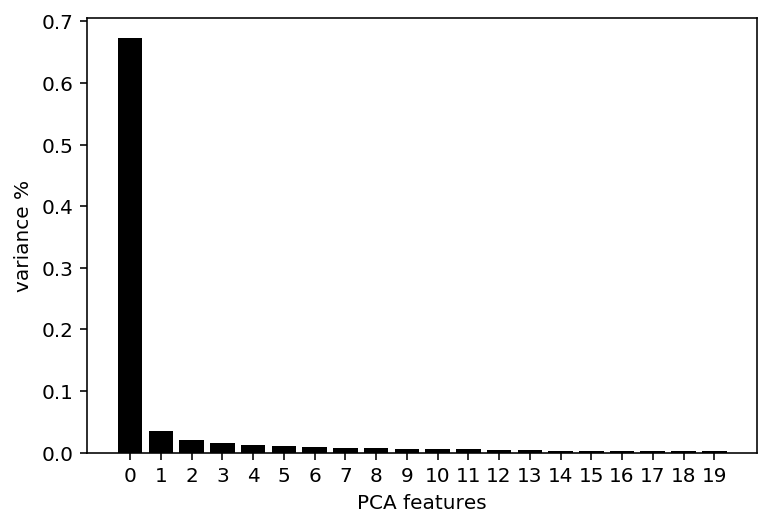

In [20]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [9]:
# Loading the results of SVD to compare
check_svd = np.memmap('/data/bioprotean/SVD/vg/rc.mymemmap', dtype='float32', mode='r', shape=(159326,271))

print(PCA_components[0][0])
print(check_svd[0,0])

Text(0, 0.5, 'PCA 2')

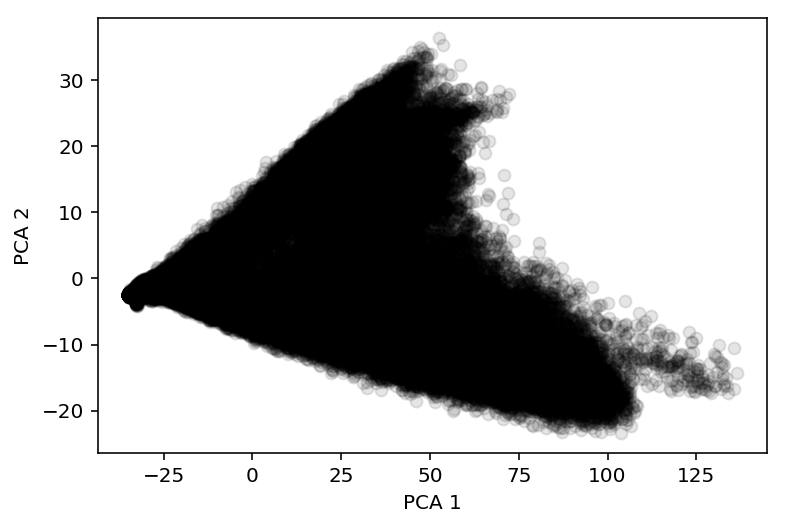

In [22]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

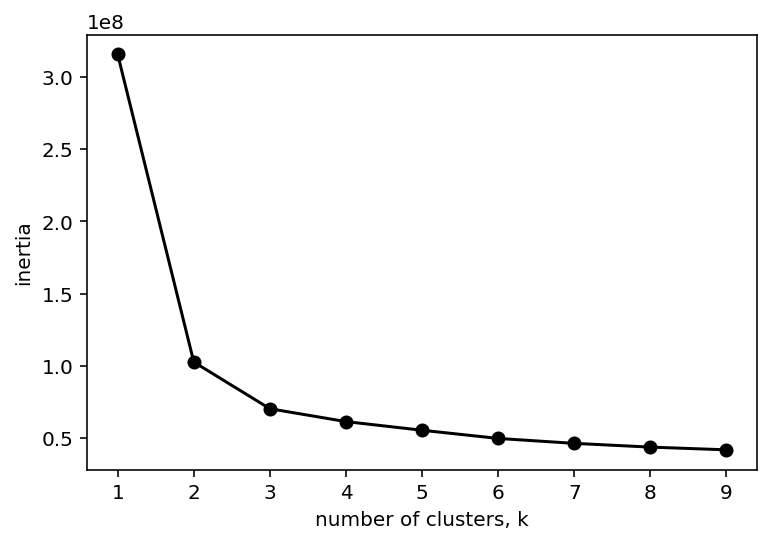

In [24]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:271])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()